# WITH SEABORN

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS
1. Box and Swarm Plots in kill data
1. Most dangerous cities
1. Most dangerous states
1. Having mental ilness or not for killed people
1. Threat types
1. Flee types
<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [2]:
df = pd.read_csv("PoliceKillingsUS.csv")

In [3]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [4]:
df.shape

(2535, 14)

## 1a: Box plot of age in both genders separeted by manner of death.

<AxesSubplot:xlabel='gender', ylabel='age'>

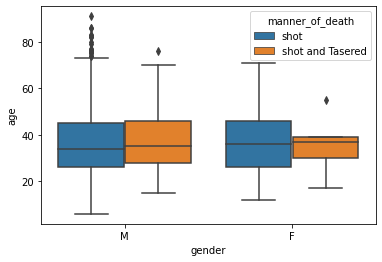

In [69]:
sns.boxplot(x="gender", y="age", data=df, hue="manner_of_death")

In [7]:
df.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

**INSTRUCTION: Demonstrate the Qurtiles of age in both genders separeted by manner of death.**

## 1b: Swarm Plot 

**INSTRUCTION: Demonstrate the age in both genders separeted by manner of death by a swarm plot.**

In [ ]:
plt.figure(figsize = (10,7))
sns.swarmplot(x="gender", y="age", data=df, hue="manner_of_death")

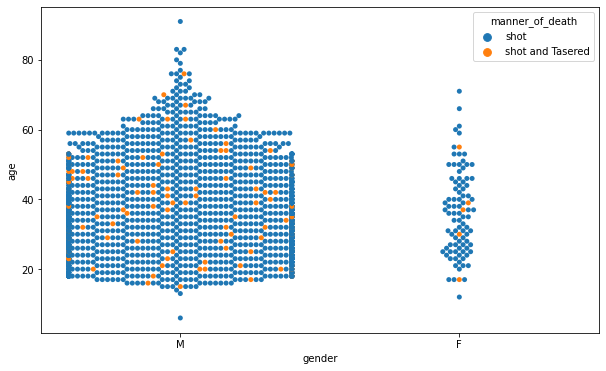

In [ ]:
# with seaborn


## 2: Plot 12 most dangerous cities

In [70]:
z=df.city.value_counts().head(12)
z

Los Angeles      39
Phoenix          31
Houston          27
Chicago          25
Las Vegas        21
San Antonio      20
Columbus         19
Austin           18
Miami            18
St. Louis        15
Tucson           14
Oklahoma City    14
Name: city, dtype: int64

<AxesSubplot:ylabel='city'>

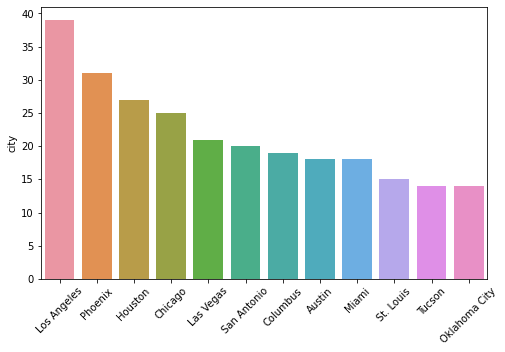

In [71]:
plt.figure(figsize=(8,5))
plt.xticks(rotation = 45)
sns.barplot(x=z.index,y=z,data=df )


In [5]:
##########

In [6]:
z = df.city.value_counts(dropna=True).head(12)

z.index 

Index(['Los Angeles', 'Phoenix', 'Houston', 'Chicago', 'Las Vegas',
       'San Antonio', 'Columbus', 'Miami', 'Austin', 'St. Louis',
       'Albuquerque', 'Tucson'],
      dtype='object')

In [7]:

citynames=z.index.to_list()
citynames

['Los Angeles',
 'Phoenix',
 'Houston',
 'Chicago',
 'Las Vegas',
 'San Antonio',
 'Columbus',
 'Miami',
 'Austin',
 'St. Louis',
 'Albuquerque',
 'Tucson']

In [8]:
h = df[df["city"].isin(citynames)]
h

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
12,22,Hashim Hanif Ibn Abdul-Rasheed,07/01/15,shot,knife,41.0,M,B,Columbus,OH,True,other,Not fleeing,False
24,46,John Edward O'Keefe,13/01/15,shot,gun,34.0,M,W,Albuquerque,NM,False,attack,Foot,True
40,75,Pablo Meza,17/01/15,shot,gun,24.0,M,H,Los Angeles,CA,False,attack,Not fleeing,False
48,90,Isaac Holmes,21/01/15,shot,gun,19.0,M,B,St. Louis,MO,False,attack,Not fleeing,False
52,336,Robert Francis Mesch,23/01/15,shot,gun,61.0,M,W,Austin,TX,True,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,2798,Jerrod Kershaw,24/07/17,shot,gun,31.0,M,W,St. Louis,MO,True,attack,Car,False
2520,2804,TK TK,26/07/17,shot,gun,35.0,M,NaN,Phoenix,AZ,False,attack,Other,False
2521,2806,TK TK,26/07/17,shot,gun,NaN,M,NaN,San Antonio,TX,False,attack,Not fleeing,False
2524,2816,Jerauld Phillip Hammond II,27/07/17,shot,gun,46.0,M,NaN,Los Angeles,CA,False,other,Not fleeing,False


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Los Angeles'),
  Text(1, 0, 'Phoenix'),
  Text(2, 0, 'Houston'),
  Text(3, 0, 'Chicago'),
  Text(4, 0, 'Las Vegas'),
  Text(5, 0, 'San Antonio'),
  Text(6, 0, 'Columbus'),
  Text(7, 0, 'Miami'),
  Text(8, 0, 'Austin'),
  Text(9, 0, 'St. Louis'),
  Text(10, 0, 'Albuquerque'),
  Text(11, 0, 'Tucson')])

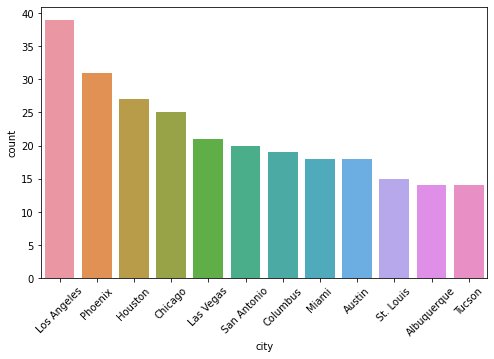

In [9]:
plt.figure(figsize=(8,5))  #mine

sns.countplot(x= df[df["city"].isin(citynames)]["city"], data = df, order =df[df["city"].isin(citynames)]["city"].value_counts().index )
plt.xticks(rotation=45)

## 3: Plot 20 most dangerous states

In [10]:
dstates = df.state.value_counts().head(20)
dstates2 = dstates.index.to_list() 
dstates2

['CA',
 'TX',
 'FL',
 'AZ',
 'OH',
 'OK',
 'CO',
 'GA',
 'NC',
 'MO',
 'WA',
 'IL',
 'TN',
 'LA',
 'NM',
 'PA',
 'AL',
 'VA',
 'NY',
 'SC']

In [43]:
# with seaborn barplot


Text(0.5, 1.0, 'Most dangerous states')

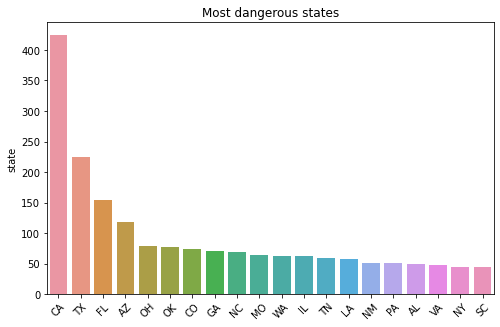

In [11]:
plt.figure(figsize=(8,5))
plt.xticks(rotation = 45)
sns.barplot(x=dstates.index,y=dstates,data=df )
plt.title("Most dangerous states")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'CA'),
  Text(1, 0, 'TX'),
  Text(2, 0, 'FL'),
  Text(3, 0, 'AZ'),
  Text(4, 0, 'OH'),
  Text(5, 0, 'OK'),
  Text(6, 0, 'CO'),
  Text(7, 0, 'GA'),
  Text(8, 0, 'NC'),
  Text(9, 0, 'MO'),
  Text(10, 0, 'WA'),
  Text(11, 0, 'IL'),
  Text(12, 0, 'TN'),
  Text(13, 0, 'LA'),
  Text(14, 0, 'PA'),
  Text(15, 0, 'NM'),
  Text(16, 0, 'AL'),
  Text(17, 0, 'VA'),
  Text(18, 0, 'NY'),
  Text(19, 0, 'SC')])

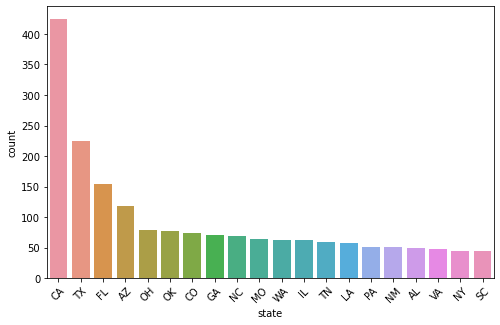

In [12]:
# with seaborn countplot  #mine
plt.figure(figsize=(8,5))

sns.countplot(x= df[df["state"].isin(dstates2)]["state"], data = df, order =df[df["state"].isin(dstates2)]["state"].value_counts().index )
plt.xticks(rotation=45)


In [ ]:
###########

## 4: Plot Having mental ilness or not for killed people

In [56]:
df.signs_of_mental_illness.value_counts(dropna=True)

False    1902
True      633
Name: signs_of_mental_illness, dtype: int64

Text(0, 0.5, 'count')

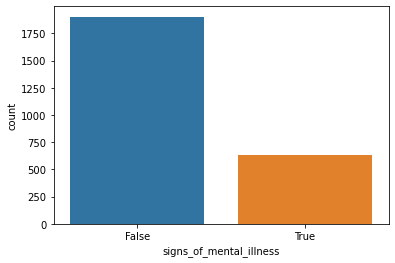

In [67]:
sns.countplot(df.signs_of_mental_illness)
plt.xlabel('signs_of_mental_illness')
plt.ylabel('count')


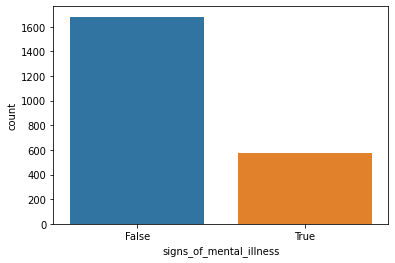

In [ ]:
# with seaborn


## 5: Plot number of Threat Types

In [61]:
df.threat_level.value_counts(dropna=True)

attack          1611
other            766
undetermined     158
Name: threat_level, dtype: int64

Text(0, 0.5, 'count')

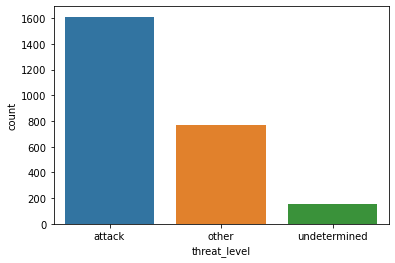

In [63]:
sns.countplot(df.threat_level)
plt.xlabel('threat_level')
plt.ylabel("count")

## 6: Plot number of Flee Types

In [65]:
df.flee.value_counts(dropna=True)

Not fleeing    1695
Car             385
Foot            294
Other            96
Name: flee, dtype: int64

Text(0, 0.5, 'count')

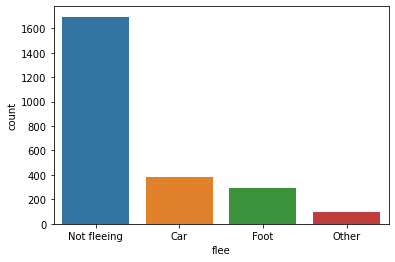

In [66]:
sns.countplot(df.flee)
plt.xlabel('flee')
plt.ylabel("count")

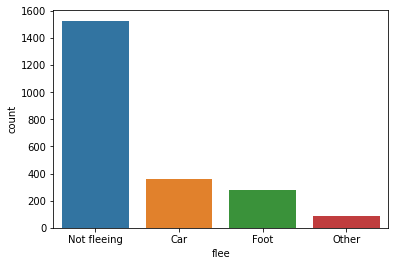

In [ ]:
# with seaborn
